Flujo de procesamiento: adquisición de imágenes, pre-procesamiento, procesamiento de imágenes, cálculo de la medición, almacenamiento.

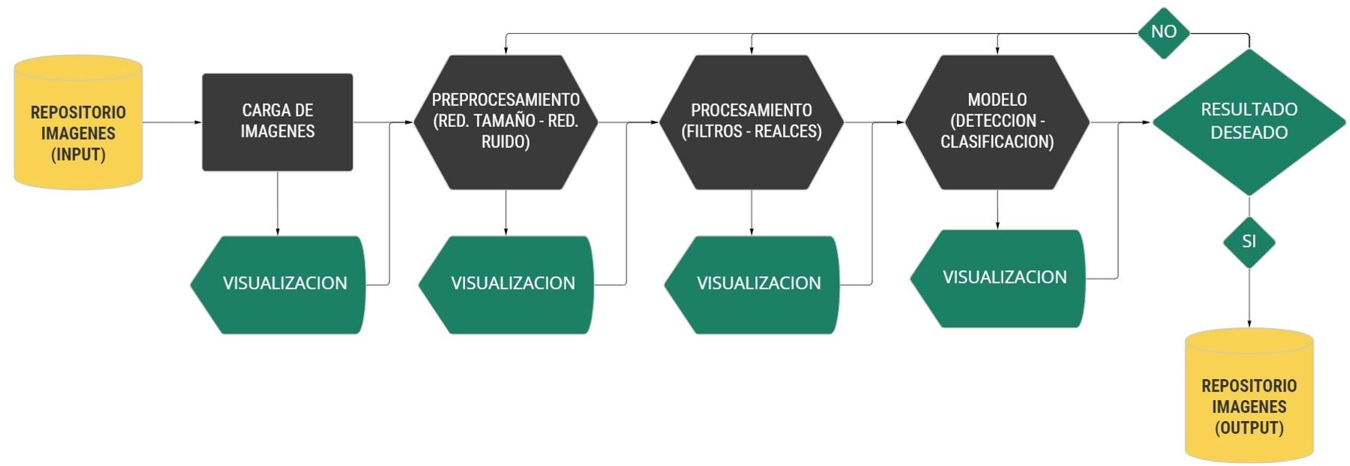


Con la base de datos seleccionada, implementar un sistema de reconocimiento y/o procesamiento en el cual se realice una medida o inferencia sobre imagen. Puede ser la detección de un objeto, medición de distancias entre píxeles de alguna característica, medición del tamaño de algún objeto (en cantidad de píxeles) clasificación de la imagen, entre otros.


In [26]:
import cv2
from PIL import Image
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

El objetivo es implementar un sistema que reconozca círculos en las imágenes, para posteriormente poder detectar anomalías en estos sectores.

Como primer paso cargamos una imagen y la cambiamos a escala de grises.

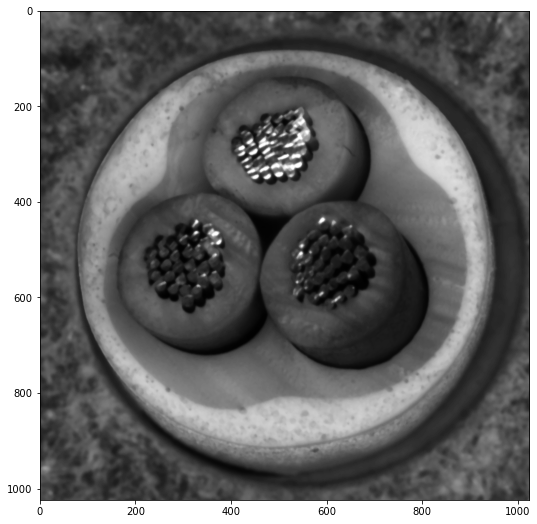

In [3]:
image = '130.png'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = (16,9)
img = cv2.medianBlur(img, 5)
plt.imshow(img, cmap='gray')

Aplicamos un filro gaussiano para obtener suavizado lineal, disminución de ruido y desplegamos la imagen para ver como queda.

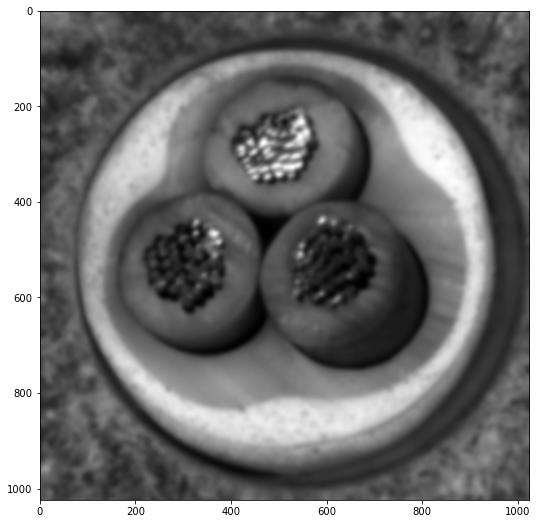

In [4]:
img = cv2.GaussianBlur(img, (81,81), cv2.BORDER_DEFAULT)
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img, cmap='gray')

Por medio de "HoughCircles" detectamos los círculos en la imagen y convertimos. Se ajustan hiperparámetros para lograr un mejor resultado.

In [5]:
all_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 
                              0.9, 120, param1 = 45, param2 = 35, 
                              minRadius = 30, maxRadius = 500)

all_circles_rounded = np.uint16(np.around(all_circles))

A continuación vemos que se detectaron 4 círculos, 2 de radio superir a 304 y 2 inferiores a 166.

In [6]:
print(all_circles_rounded)
print(all_circles_rounded.shape)

[[[518 488 421]
  [648 588 165]
  [346 566 156]
  [560 310 132]]]
(1, 4, 3)


Dibujamos los círculos en la imagen, creamos un contador en el centro para graficar el número de círculos.

In [7]:
count = 1
for i in all_circles_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2], (50, 200, 200), 5)
    cv2.circle(img_orig, (i[0],i[1]), 2, (255, 0, 0), 3)
    cv2.putText(img_orig, 'C'+str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255,0,0), 2)
    count +=1

Desplegamos la imagen y vemos que hay 3 círculos que detectó relativamente bien y hay uno que detecta más desplazado, lo cual se obtuvo después de modificar los hiperparámetros.

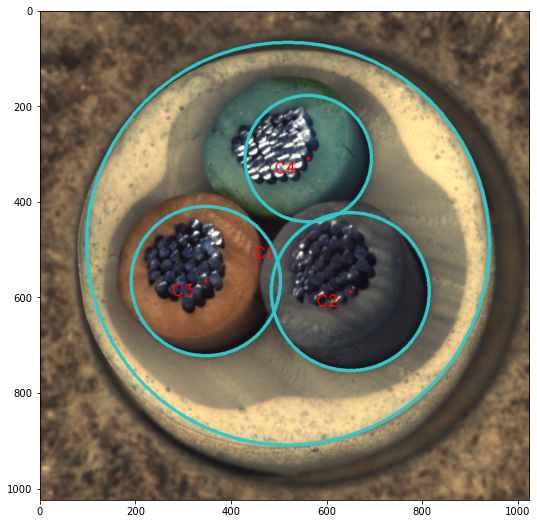

In [8]:
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_orig)

Para procesar el conjunto completo de imágenes, medir los tiempos de ejecución del proceso completo. Realizar la medición para el 50% y el 100% de la imágenes varias veces, de manera de obtener algunas figuras estadísticas: tiempo máximo, tiempo mínimo, tiempo medio, desviación estándar del tiempo.

In [20]:
import time
path = "data_img"

En primera instancia hacemos el proceso para un total de 252 imágenes de 1024x1024, configuramos para que el proceso se repita 20 veces y el loop interno de 200 veces.

In [21]:
for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.medianBlur(img_gray, 5)
        img_gray = cv2.GaussianBlur(img_gray, (81,81), cv2.BORDER_DEFAULT)

for img in os.listdir(path): 
        circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 
                              0.9, 120, param1 = 45, param2 = 35, 
                              minRadius = 30, maxRadius = 500)
        all_circles_rounded = np.uint16(np.around(circles))

%timeit -r20 -n200 [num for num in range(20)]

1.09 µs ± 4.62 ns per loop (mean ± std. dev. of 20 runs, 100 loops each)


Obtuvimos un tiempo total de ejecución de 47.2 seg., una media de 1.09 microsegundos y una desviación estándar de 4.62 nanosegundos.

Ahora hacemos el mismo proceso pero para 126 imágenes.

In [38]:
path = 'data_img_half'

In [39]:
for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.medianBlur(img_gray, 5)
        img_gray = cv2.GaussianBlur(img_gray, (81,81), cv2.BORDER_DEFAULT)

for img in os.listdir(path): 
        circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 
                              0.9, 120, param1 = 45, param2 = 35, 
                              minRadius = 30, maxRadius = 500)
        all_circles_rounded = np.uint16(np.around(circles))

%timeit -r20 -n200 [num for num in range(20)]

1.18 µs ± 124 ns per loop (mean ± std. dev. of 20 runs, 200 loops each)


Con 126 imágenes, la media fue de 1.18 microsegundos, la desviación estándar fue de 124 nanosegundos y el tiempo total de ejecución fue de 34.6 segundos. En comparación con el ejercicio anterior, donde eran el doble de imágenes, en este segundo ejercicio el algoritmo tomó más tiempo en realizar cada ciclo y el tiempo total no es proporcional ya que es mucho más de la mitad.

Hacer resumen de los resultados del procesamiento. Para ello debe decidir una métrica para indicar si el procesamiento es satisfactorio. Para esto último algunas veces es necesario hacer la evaluación en forma manual, por lo tanto, si fuera este el caso, seleccionar un sub-conjunto de las imágenes (por ejemplo, unas 50) y comparar el desempeño del algoritmo en estas imágenes.

In [32]:
path = 'data'

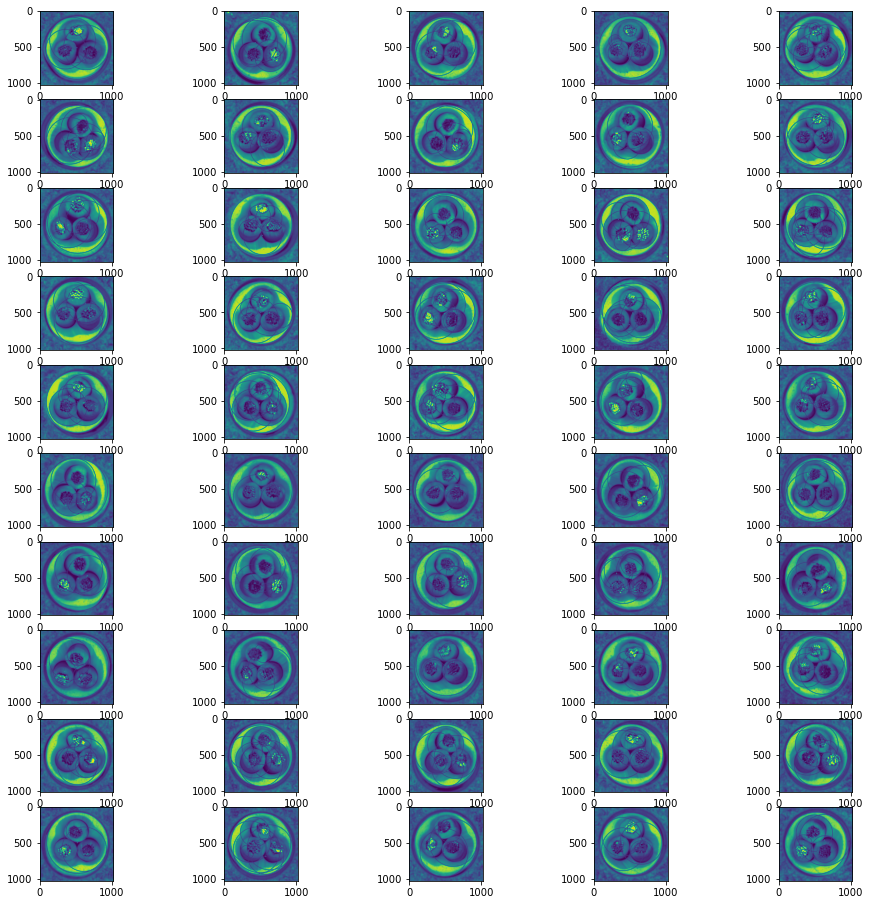

In [40]:
img_list = []

for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.medianBlur(img_gray, 5)
        img_gray = cv2.GaussianBlur(img_gray, (81,81), cv2.BORDER_DEFAULT)
        circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 
                              0.9, 120, param1 = 45, param2 = 35, 
                              minRadius = 30, maxRadius = 500)
        all_circles_rounded = np.uint16(np.around(circles))

        for i in all_circles_rounded[0, :]:
                cv2.circle(img_gray, (i[0],i[1]),i[2], (50, 200, 200), 5)
                cv2.circle(img_gray, (i[0],i[1]), 2, (255, 0, 0), 3)
        img_list.append(img_gray)


_, axs = plt.subplots(10, 5, figsize=(16, 16))
axs = axs.flatten()
for image, ax in zip(img_list, axs):
    ax.imshow(image)
plt.show()

Al ejecutar el algoritmo de forma masiva con 50 imágenes, se observa que no es eficiente, por lo tanto podríamos decir que el proceso no es satisfactorio y requiere de un mayor estudio y trabajo para poder llegar a un resultado esperado. Pero podemos destacar que se logró realizar un proceso de tratamiento de imágenes con aplicación de algoritmo para la detección de círculos, se investigó sobre los hiperparámetros y se fueron ajustando, logrando en forma individual un resultado aceptable.